In [5]:
import pandas as pd  
import numpy as np 
from collections import Counter


# 加载数据

In [63]:
data = pd.read_csv('wisconsin_dells.csv')

data

,id,nnights,nadults,nchildren,planning,sex,age,education,income,region,...,helicopter,horseride,standrock,outattract,nearbyattract,movietheater,concerttheater,barpubdance,shopbroadway,bungeejumping
0,1,3,2,3,This Month,Female,35-44,HS Grad or Less,Lower Income,Other,...,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO
1,2,3,4,5+,One Month or More Ago,Male,35-44,College Grad,NaN,Minneapolis/StPaul,...,NO,NO,YES,YES,YES,NO,NO,NO,NO,NO
2,3,4+,2,2,One Month or More Ago,Male,35-44,College Grad,Lower Income,Chicago,...,NO,YES,YES,YES,YES,NO,YES,NO,YES,NO
3,4,3,1,1,This Month,Female,35-44,Post Grad,Lower Income,Chicago,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
4,5,4+,5+,5+,One Month or More Ago,Female,35-44,Post Grad,NaN,Other,...,NO,NO,YES,YES,NO,NO,NO,NO,YES,NO
5,6,0,2,4,One Month or More Ago,Male,35-44,College Grad,NaN,Other,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
6,7,1,2,4,This Week,Female,35-44,College Grad,Middle Income,Other Wisconsin,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
7,8,4+,5+,2,One Month or More Ago,Male,35-44,Post Grad,Lower Income,Other,...,NO,YES,NO,YES,YES,NO,NO,YES,YES,NO
8,9,0,2,No kids,This Week,Male,35-44,HS Grad or Less,Lower Income,Madison,...,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO
9,10,3,2,2,One Month or More Ago,Female,35-44,HS Grad or Less,Lower Income,Chicago,...,NO,YES,YES,NO,NO,NO,NO,NO,YES,NO


# 生成二进制活动矩阵

In [85]:
binary_activity_data_frame  = pd.DataFrame()

for column in data.columns[10:]:
    binary_activity_data_frame[column]=(data[column]=='YES').astype('int') 
    
binary_activity_matrix = binary_activity_data_frame.as_matrix().T

print(data.columns[10:])
binary_activity_matrix

Index(['shopping', 'antiquing', 'scenery', 'eatfine', 'eatcasual',
       'eatfamstyle', 'eatfastfood', 'museums', 'indoorpool', 'outdoorpool',
       'hiking', 'gambling', 'boatswim', 'fishing', 'golfing', 'boattours',
       'rideducks', 'amusepark', 'minigolf', 'gocarting', 'waterpark',
       'circusworld', 'tbskishow', 'helicopter', 'horseride', 'standrock',
       'outattract', 'nearbyattract', 'movietheater', 'concerttheater',
       'barpubdance', 'shopbroadway', 'bungeejumping'],
      dtype='object')


array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

# 求距离矩阵(曼哈顿距离)

In [116]:
from sklearn.metrics.pairwise import manhattan_distances
distance_matrix = manhattan_distances(activities_binary_matrix)
distance_matrix    

array([[   0., 1082.,  547., ..., 1033.,  338., 1277.],
       [1082.,    0.,  967., ...,  553.,  976.,  399.],
       [ 547.,  967.,    0., ...,  948.,  609., 1118.],
       ...,
       [1033.,  553.,  948., ...,    0.,  901.,  462.],
       [ 338.,  976.,  609., ...,  901.,    0., 1141.],
       [1277.,  399., 1118., ...,  462., 1141.,    0.]])

# MDS降维

In [119]:
from sklearn import manifold
mds_solution = manifold.MDS(n_components=2,random_state = 9999,dissimilarity = 'precomputed').fit_transform(distance_matrix)
print(mds_solution)

D:\ANACONDA\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


[[  416.27484427 -1760.7304731 ]
 [ -611.6130354   1277.50454475]
 [  686.051643   -1054.37994206]
 [ -380.98128911   383.22669947]
 [  268.30030695  -755.42991135]
 [  222.63486619 -1398.47198076]
 [ -836.40916963  -803.84909345]
 [  508.43518486  -498.07355296]
 [   -6.63462239  -891.03601593]
 [  -60.42056134 -1354.43616318]
 [ -312.53590955  1253.17070258]
 [ -732.60757934   457.06103898]
 [ -233.8988534   -563.13732182]
 [ -174.5999155   1305.79437862]
 [ -794.00338973  1086.34505806]
 [  853.63962334  -432.97535166]
 [  774.84065744  -575.5240898 ]
 [ -270.03697267 -1253.21635923]
 [ -471.21570899  -961.01334958]
 [ -446.8862493   -774.26350983]
 [ -507.33891455 -1513.93358617]
 [  479.10697267   963.85850011]
 [  301.56298774    27.72104663]
 [   15.41539475  1494.41692056]
 [   50.68871373   878.21764827]
 [  393.70992407  1116.83687891]
 [  688.43124658   -67.01251374]
 [  683.84030426   238.66099267]
 [ -197.58446502  1591.88840118]
 [  190.55009993  1263.19012923]
 [ -561.96

# 绘制图像

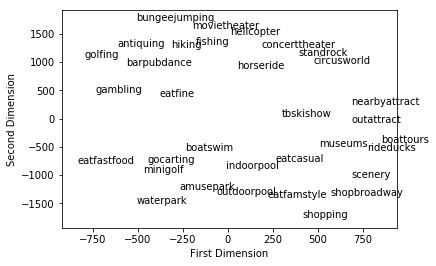

In [120]:
import matplotlib.pyplot as plt 


plt.scatter(mds_solution[:,0],mds_solution[:,1],facecolors = 'none', edgecolors = 'none') 
labels = data.columns[10:]
for label, x, y in zip(labels, mds_solution[:,0], mds_solution[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')    
plt.show()

# 欧氏距离

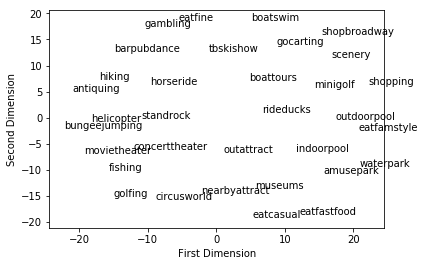

In [121]:
mds_solution = manifold.MDS(n_components=2,random_state = 9999).fit_transform(activities_binary_matrix)

